# STAT 198 Quantitative Finance Final Project
## Data Cleaning
Ming Fong and Alex Yang

In [3]:
# pip install pytrends

Note: you may need to restart the kernel to use updated packages.


In [89]:
import yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
from pytrends import dailydata

from sklearn import linear_model
import statsmodels.api as sm

In [2]:
pytrends = TrendReq(hl = "en-US", tz = 480)
# Up to 5 items in keyword list
kw_list = ["Microsoft"]
"""
Categories for cat parameter
https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories
"""
pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='', gprop='')
trend = pytrends.interest_over_time()

In [6]:
trend

,Tesla,isPartial
date,,
2004-01-01,6,False
2004-02-01,7,False
2004-03-01,8,False
2004-04-01,7,False
2004-05-01,6,False
...,...,...
2020-07-01,81,False
2020-08-01,80,False
2020-09-01,100,False


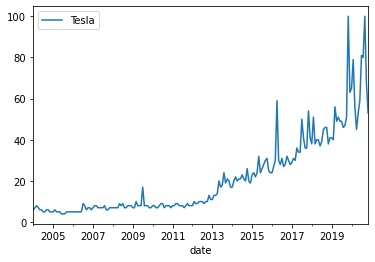

In [7]:
trend.plot()

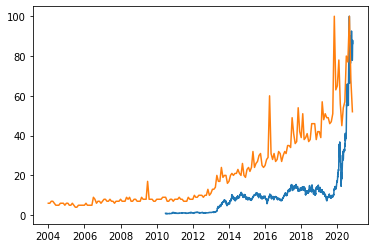

In [8]:
scaled_tsla = tsla["Adj Close"] / tsla["Adj Close"].max() * 100
plt.plot(scaled_tsla)
plt.plot(trend["Tesla"])

In [5]:
daily_trend = dailydata.get_daily_data('Microsoft', 2018, 1, 2018, 12, wait_time = 0)

Microsoft:2018-01-01 2018-01-31
Microsoft:2018-02-01 2018-02-28
Microsoft:2018-03-01 2018-03-31
Microsoft:2018-04-01 2018-04-30
Microsoft:2018-05-01 2018-05-31
Microsoft:2018-06-01 2018-06-30
Microsoft:2018-07-01 2018-07-31
Microsoft:2018-08-01 2018-08-31
Microsoft:2018-09-01 2018-09-30
Microsoft:2018-10-01 2018-10-31
Microsoft:2018-11-01 2018-11-30
Microsoft:2018-12-01 2018-12-31


In [6]:
daily_trend.head()

,Microsoft_unscaled,Microsoft_monthly,isPartial,scale,Microsoft
date,,,,,
2018-01-01,50,NaN,NaN,NaN,NaN
2018-01-02,78,NaN,NaN,NaN,NaN
2018-01-03,84,NaN,NaN,NaN,NaN
2018-01-04,90,NaN,NaN,NaN,NaN
2018-01-05,85,NaN,NaN,NaN,NaN


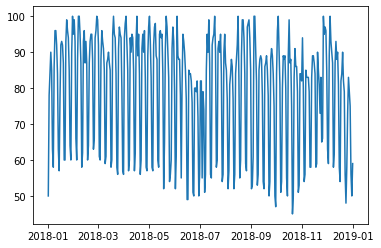

In [7]:
plt.plot(daily_trend['Microsoft_unscaled'])

In [11]:
pytrends = TrendReq(hl = "en-US", tz = 480)
kw_list = ["Microsoft"]
hourly_trend = pytrends.get_historical_interest(kw_list, year_start=2019, month_start=1, day_start=1, hour_start=0, year_end=2019, month_end= 12, day_end=31, hour_end=23, cat=0, geo='', gprop='', sleep=0)
hourly_trend

,Microsoft,isPartial
date,,
2019-01-01 00:00:00,0,False
2019-01-01 01:00:00,0,False
2019-01-01 02:00:00,0,False
2019-01-01 03:00:00,0,False
2019-01-01 04:00:00,0,False
...,...,...
2019-12-31 19:00:00,62,False
2019-12-31 20:00:00,60,False
2019-12-31 21:00:00,60,False


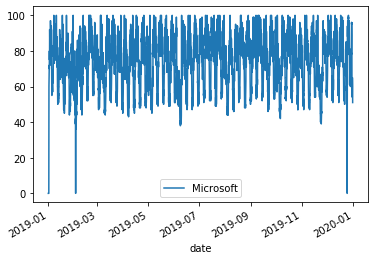

In [12]:
hourly_trend.plot()

In [13]:
hourly_trend['Month'] = hourly_trend.index.month
hourly_trend['Day'] = hourly_trend.index.day

In [14]:
daily_trend = hourly_trend.groupby(['Month', 'Day']).mean()

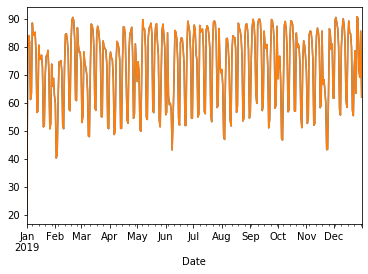

In [15]:
months = [i[0] for i in daily_trend.index]
days = [i[1] for i in daily_trend.index]
year = [2019] * 365
zipped = zip(year, months, days)
dates = [str(i[0])+"-"+str(i[1])+"-"+str(i[2]) for i in zipped]

daily_trend['Date'] = pd.to_datetime(dates)
daily_trend.index = daily_trend['Date']
daily_trend['Microsoft'].plot()

daily_trend['Date'] = pd.to_datetime(dates)
daily_trend.index = daily_trend['Date']
daily_trend['Microsoft'].plot()

In [37]:
stock_data = pd.read_csv('MSFT Stock Price and Returns.csv')

# Read in stock price csv

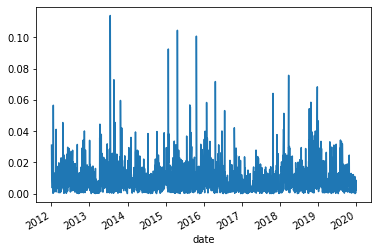

In [55]:
stock_data["ABS_RETX"] = abs(stock_data["RETX"])
stock_data["ABS_RETX"].plot()

In [54]:
stock_data.index = pd.to_datetime(stock_data["date"])
stock_data

,PERMNO,date,TICKER,PRC,RETX,ABS_RETX
date,,,,,,
2012-01-03,10107,01/03/2012,MSFT,26.76500,0.031009,0.031009
2012-01-04,10107,01/04/2012,MSFT,27.40000,0.023725,0.023725
2012-01-05,10107,01/05/2012,MSFT,27.68000,0.010219,0.010219
2012-01-06,10107,01/06/2012,MSFT,28.10500,0.015354,0.015354
2012-01-09,10107,01/09/2012,MSFT,27.74000,-0.012987,0.012987
...,...,...,...,...,...,...
2019-12-24,10107,12/24/2019,MSFT,157.38000,-0.000191,0.000191
2019-12-26,10107,12/26/2019,MSFT,158.67000,0.008197,0.008197
2019-12-27,10107,12/27/2019,MSFT,158.96001,0.001828,0.001828


In [68]:
thirty_days = tesla_volatility[tesla_volatility['days'] == 30]

# Overlay trends and returns plot

In [56]:
stock_data["ABS_RETX"].index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='date', length=2012, freq=None)

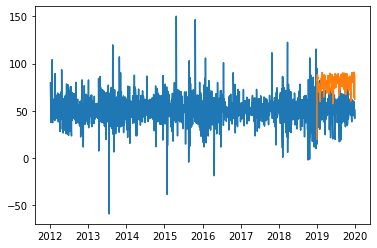

In [91]:

plt.plot(stock_data["RETX"] / max(stock_data["RETX"]) * 100 + 50)
# plt.plot(stock_data["ABS_RETX"] / max(stock_data["ABS_RETX"]) * 100 + 50)
# plt.plot(daily_trend["Microsoft"][daily_trend.index.dayofweek < 5].rolling(window = 7, min_periods = 1).mean())
plt.plot(daily_trend["Microsoft"][daily_trend.index.dayofweek < 5])
# plt.xlim(pd.to_datetime("2019-01-01"), pd.to_datetime('2019-12-31'))

# Linear Model

In [101]:
daily_trend["Microsoft"][stock_data.index].dropna()

date
2019-01-02    79.583333
2019-01-03    84.041667
2019-01-04    81.708333
2019-01-07    88.541667
2019-01-08    84.080000
                ...    
2019-12-24    78.640000
2019-12-26    90.791667
2019-12-27    90.166667
2019-12-30    85.625000
2019-12-31    62.080000
Name: Microsoft, Length: 252, dtype: float64

In [102]:
stock_data["RETX"][stock_data.index.year == 2019]

date
2019-01-02   -0.004430
2019-01-03   -0.036788
2019-01-04    0.046509
2019-01-07    0.001275
2019-01-08    0.007251
                ...   
2019-12-24   -0.000191
2019-12-26    0.008197
2019-12-27    0.001828
2019-12-30   -0.008619
2019-12-31    0.000698
Name: RETX, Length: 252, dtype: float64

In [103]:
Y = stock_data["RETX"][stock_data.index.year == 2019]
X = daily_trend["Microsoft"][stock_data.index].dropna()
X = sm.add_constant(X)
model = sm.OLS(Y, X)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   RETX   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.04977
Date:                Sun, 15 Nov 2020   Prob (F-statistic):              0.824
Time:                        22:04:36   Log-Likelihood:                 746.60
No. Observations:                 252   AIC:                            -1489.
Df Residuals:                     250   BIC:                            -1482.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0038      0.009      0.430      0.667      -0.014       0.021
Microsoft  -2.423e-05      0.000     -0.223      0.824      -0.000       0.000
==============================================================================
Omnibus:                        9.579   Durbin-Watson:                   2.260
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               14.973
Skew:                          -0.216   Prob(JB):                     0.000561
Kurtosis:                       4.113   Cond. No.                         896.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Misc

In [69]:
thirty_days['date'] = pd.to_datetime(thirty_days['date'])

<ipython-input-69-9896f09414ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thirty_days['date'] = pd.to_datetime(thirty_days['date'])


(737060.0, 737424.0)

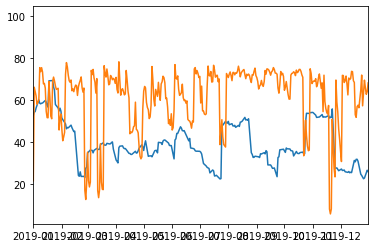

In [165]:
thirty_days.index = thirty_days['date']
thirty_days['volatility'].plot()

scaled_thirty_days = thirty_days['volatility'] / thirty_days['volatility'].max() * 100
plt.plot(scaled_thirty_days)
plt.plot(daily_trend['Tesla'])
plt.xlim(pd.to_datetime("2019-01-01"), pd.to_datetime('2019-12-31'))